# Polynomial Regression

In [378]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

# Poly
from sklearn.preprocessing import PolynomialFeatures

# Metrics
from sklearn.metrics import mean_squared_error

In [367]:
# Datasets

# 1
x1 = 10 * np.random.normal(0,5,100) + 0.3
y1 = 1 + 2*x1 + np.random.normal(-1,1,100)
#x1 = x1[:, np.newaxis]
#y1 = y1[:, np.newaxis]

# 2
x2 = 2 * np.random.normal(1,2,100) + 1.6
y2 = x2 - 2 * (x2 ** 2) + np.random.normal(-1,1,100)
# transforming the data to include another axis
x2 = x2[:, np.newaxis]
y2 = y2[:, np.newaxis]

# 3
x3 = 3 * np.random.normal(1,3,100) + 3
y3 = x3 - 2 * (x3 ** 2) - 5 * (x3 ** 3) + np.random.normal(-2,2,100)
# transforming the data to include another axis
x3 = x3[:, np.newaxis]
y3 = y3[:, np.newaxis]

# 4
x4 = 1 * np.random.normal(1,4,200) - 2.5
y4 = x4 + 2 * (x4 ** 2) + 5 * (x4 ** 3) - 5*(x4**4) + np.random.normal(-2,3,200)
# transforming the data to include another axis
x4 = x4[:, np.newaxis]
y4 = y4[:, np.newaxis]

# 5
x5 = .5 * np.random.normal(1,5,300)+ 1
y5 = x5 + 2 * (x5 ** 2) + 5 * (x5 ** 3) - 5*(x5**4) + 2*(x5**5) + np.random.normal(-1,2, 300)
# transforming the data to include another axis
x5 = x5[:, np.newaxis]
y5 = y5[:, np.newaxis]

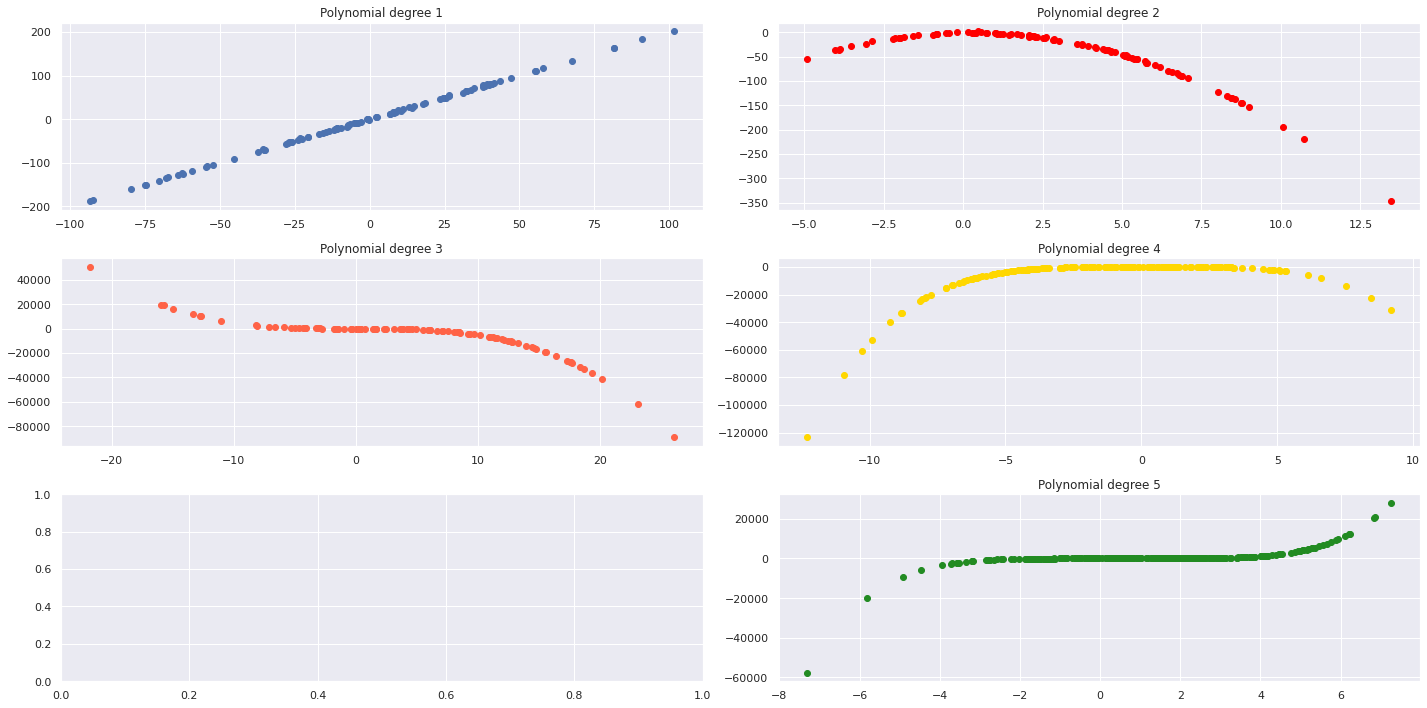

In [368]:
# Setup figure
fig, [(g1, g2), (g3, g4), (g5, g5)] = plt.subplots(3, 2, figsize=(20,10))

g1.scatter(x1, y1)
g1.set_title('Polynomial degree 1')
g2.scatter(x2, y2, color='red')
g2.set_title('Polynomial degree 2')
g3.scatter(x3, y3, color='tomato')
g3.set_title('Polynomial degree 3')
g4.scatter(x4, y4, color='gold')
g4.set_title('Polynomial degree 4')
g5.scatter(x5, y5, color='forestgreen')
g5.set_title('Polynomial degree 5')
plt.tight_layout();

In [371]:
# Dataset
X = 8 * np.random.rand(500, 1)
y = 1 + X**2 + X + 2 + np.random.randn(500,1)

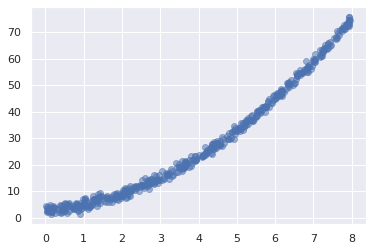

In [372]:
# Plot
plt.scatter(X,y, alpha=0.5);

In [373]:
from sklearn.linear_model import LinearRegression

In [411]:
# Linear Regression
linear_model = LinearRegression().fit(X,y)
# Predictions
preds = linear_model.predict(X)
# R2
linear_model.score(X,y)

0.9466586015765989

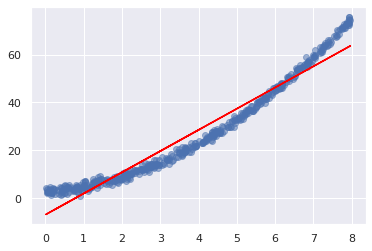

In [376]:
# Plot
plt.scatter(X,y, alpha=0.5)
plt.plot(X, preds, 'red');

In [384]:
# y_mean
label_mean =  np.mean(y)
print('label mean:', label_mean )

# RMSE
rmse = np.sqrt( mean_squared_error(y, preds))
print('RMSE:', rmse )

# % Off
print('% off:',rmse/label_mean)

label mean: 26.91768042533155
RMSE: 4.937613270465381
% off: 0.18343383205555547


Let's transform the data to make it exponential

In [406]:
# Instance
poly2 = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly2.fit_transform(X)

# Fit Linear model with poly features
poly_model = LinearRegression().fit(X_poly,y)
poly_pred = poly_model.predict(X_poly)

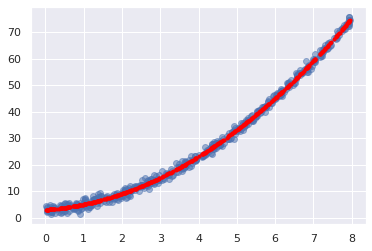

In [407]:
# Plot
plt.scatter(X,y, alpha=0.5);
plt.plot(X, poly_pred, color='red', linestyle='', marker='.', lw=0.1)

In [408]:
# y_mean
label_mean =  np.mean(y)
print('label mean:', label_mean )

# RMSE
rmse = np.sqrt( mean_squared_error(y, poly_pred))
print('RMSE:', rmse )

# % Off
print('% off:',rmse/label_mean)

label mean: 26.91768042533155
RMSE: 1.0254085813750857
% off: 0.038094240111792826


In [410]:
poly_model.score(X_poly, y)

0.9976994898740914

#### Quadratic

In [571]:
# Dataset
np.random.seed(12)
X2 = 4 * np.random.normal(2,4,200) - 3
y2 = X2 - 2 * (X2 ** 2) + 24 * (X2 ** 3) - 5*(X2**4) + np.random.normal(-10,81,200)

In [572]:
# transforming the data to include another axis
X2 = X2[:, np.newaxis]
y2 = y2[:, np.newaxis]

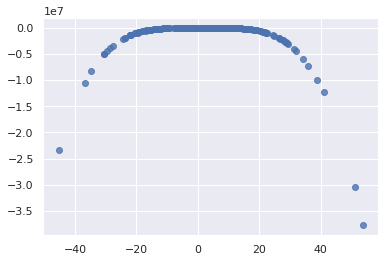

In [573]:
# Plot
plt.scatter(X2,y2, alpha=0.8);

In [767]:
# Function to fit different models
def fit_polynomials(X, y, from_=1, to_= 10, step=1):
  '''
  This function takes the explanatory (X) and response variables (y) and runs the data through a pipeline that fits Linear Regressions
  of different degrees (values specified by the user) and plot the results.
  Inputs:
  * from: int = initial degree for polynomial fit
  * to: int = final degree for polynomial fit
  * step:int = step to increase
  * X = explanatory variables
  * y = target variable

  Returns:
  plot
  score
  '''
  from sklearn.pipeline import Pipeline
  
  # Store scores and predictions
  scores = []
  preds = pd.DataFrame({'X':X2.flatten(), 'y': y2.flatten()})

  # Loop between the specified values
  for n in range(from_, to_+1, step):
    # Steps
    steps = [
        ('Polynomial', PolynomialFeatures(degree=n)),
        ('model', LinearRegression())  ]
    
    # Pipeline fit
    fit_poly = Pipeline(steps).fit(X,y)
    # Predict
    poly_pred = fit_poly.predict(X)
    preds[f'degree{n}'] = poly_pred
    
    # Evaluate
    model_score = fit_poly.score(X,y)
    scores.append((n, model_score))

  # Plot
  preds.plot('X', preds.columns[2:] , linestyle='', marker='.', ms=20, figsize=(18,9), alpha=0.6)
  plt.plot(X, y , linestyle='', marker='.', color='k', ms=10, label='Y')
  plt.legend();

  return scores

[(10, 0.9999999996655948), (20, 0.981729752828847), (30, 0.9246351850951822)]

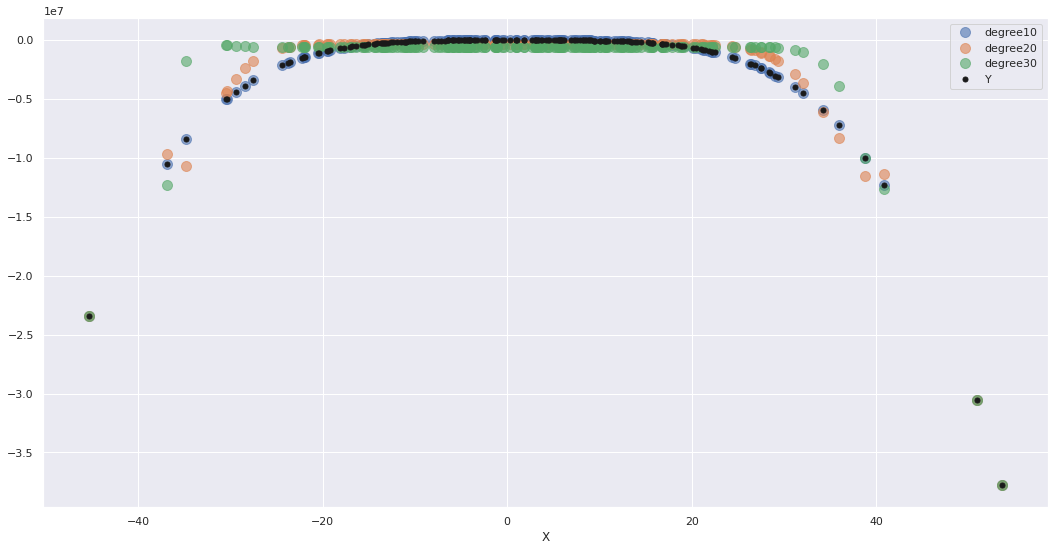

In [769]:
fit_polynomials(X2, y2, 10, 30, 10)

In [692]:
np.random.randint(1,10,2)

array([0.08333333, 0.75      ])